# Projet numérique : Choix du pas de temps

###### Auteurs : Mathis Boutrouelle et Valentin Fenoux

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Tlim = 10 ; Tau = 1

# Pas fixe

## Schéma convergent d'ordre 1 : la méthode d'Euler explicite

Nous commençons par définir la fonction qui permet de résoudre l'équation différentielle grâce au schéma d'Euler explicite. Dans la fonction nous introduisons une constante $T_{lim} $ qui est la durée sur laquelle nous voulons faire la simulation, ainsi qu'une constante $\tau$ qui est la constante de temps de l'équation différentielle choisi (cf plus bas).

In [3]:
def solver_euler_explicite(f,x0,dt) :
    vect_x = [x0]   # Vecteur de la solution
    x = x0
    vect_t = [0]    # Vecteur des temps
    n = int(Tlim//dt)    # n : nombre de points sur l'intervalle de temps pour un dt donné
    for i in range(1,n) :
        x = vect_x[i-1] + dt*f(vect_x[i-1])   # Application du schéma d'Euler
        vect_x.append(x)
        vect_t.append(i*dt)
    return(vect_t, vect_x)

Nous allons tester les performances de notre solveur sur l'équation : $$ \overset{.}{x} = \frac{1 - x}{\tau} $$ qui se résoud explicitement sous la forme : $ x(t) = 1 - e^{\frac{-t}{\tau}} $

### Exemple avec dt = 0.1

On commence d'abord par créer les vecteurs de la solution littérale.

In [4]:
t_lit = np.arange(0, Tlim, 0.1)   # On crée un vecteur des temps avec le pas de temps choisi
x_lit = []

def lit(t, Tau):
    return 1 - np.exp(-t/Tau)

for t in t_lit :
    x = lit(t, Tau)
    x_lit.append(x)

On peut alors chercher la solution avec le solveur numérique, en sachant que $x_0 = 0$. 

In [5]:
def f(x) :
    return((1 - x)/Tau)

t_num,x_num = solver_euler_explicite(f,0,0.1)

Affichage des résultats.

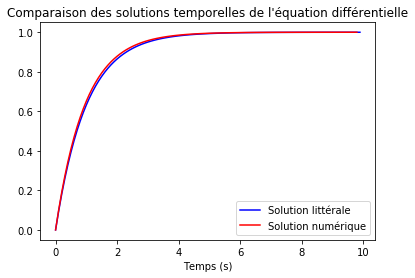

In [6]:
plt.plot(t_lit, x_lit, 'b', label="Solution littérale")
plt.plot(t_num, x_num, 'r', label="Solution numérique")
plt.legend()
plt.xlabel('Temps (s)')
plt.title("Comparaison des solutions temporelles de l'équation différentielle")
plt.show()

On remarque qu'il y'a une petite erreur sur la solution numérique.

### Convergence du schéma

Pour illustrer la convergence (d'ordre 1 pour ce schéma d'Euler explicite), on vérifie que $\: \exists c_v \: / \: \forall dt, \: \underset{i\leqslant n}{\max}{|{x_{lit}[t_i]-x_{num}[t_i]}|} \leqslant c_vdt \:$ pour différents pas de temps.

In [7]:
DT = np.linspace(0.0001,7,100) #100 pas de temps différents

def max_erreur(DT, solver):
    maxs = np.zeros((len(DT)))
    for i, dt in enumerate(DT):   #calcul du maximum de l'erreur pour plusieurs pas de temps
        t_num,x_num = solver(f,0,dt)
        for t, x in zip(t_num, x_num):   #calcul du maximum de l'erreur
            erreur = abs(x - lit(t, Tau))
            if erreur > maxs[i]:
                maxs[i] = erreur
    return maxs

maxs = max_erreur(DT, solver_euler_explicite)

Affichage des résultats.

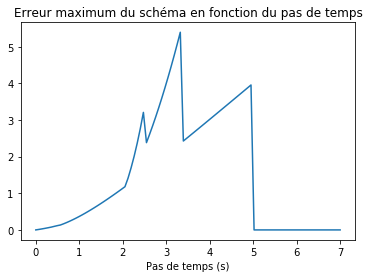

In [8]:
plt.plot(DT, maxs)
plt.xlabel('Pas de temps (s)')
plt.title("Erreur maximum du schéma en fonction du pas de temps")
plt.show()

On remarque que pour $dt > 5s$ l'erreur est nulle, en effet la solution ne comprend qu'un point car $10//dt = 0$.
De plus, on remarque que l'erreur peut bien être majorée par une fonction linéaire, par exemple $y = 2dt$. Donc $c_v = 2$ convient.

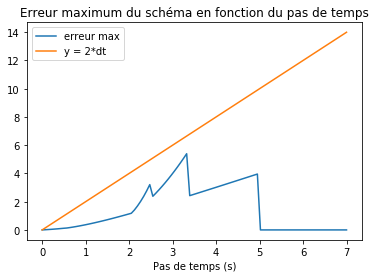

In [9]:
plt.plot(DT, maxs, label = "erreur max")
plt.plot(DT, 2*DT, label = "y = 2*dt")
plt.legend()
plt.xlabel('Pas de temps (s)')
plt.title("Erreur maximum du schéma en fonction du pas de temps")
plt.show()

La zone est critique est la zone proche de 0, regardons de plus près.

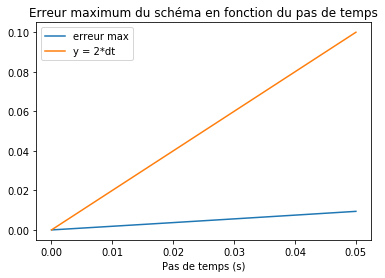

In [10]:
DT2 = np.linspace(0.00001, 0.05, 50)
plt.plot(DT2, max_erreur(DT2, solver_euler_explicite), label = "erreur max")
plt.plot(DT2, 2*DT2, label = "y = 2*dt")
plt.legend()
plt.xlabel('Pas de temps (s)')
plt.title("Erreur maximum du schéma en fonction du pas de temps")
plt.show()

La majoration semble toujours valable dans ce voisinage de 0.

## Schéma convergent d'ordre 2 : la méthode de Heun

In [11]:
def solver_heun(f,x0,dt) :
    vect_x = [x0]   # Vecteur de la solution
    x = x0
    vect_t = [0]    # Vecteur des temps
    n = int(Tlim//dt)    # n : nombre de points sur l'intervalle de temps pour un dt donné
    for i in range(1,n) :
        x = vect_x[i-1] + 0.5*dt*(f(vect_x[i-1]) + f(vect_x[i-1] + dt*f(vect_x[i-1])))   # Application du schéma de Heun
        vect_x.append(x)
        vect_t.append(i*dt)
    return(vect_t, vect_x)

### Exemple avec dt = 0.1

Résolvons la même équation qu'avec le schéma précédent avec dt = 0.1

In [12]:
t_lit = np.arange(0, Tlim, 0.1)   # On crée un vecteur des temps avec le pas de temps choisi
x_lit = []

for t in t_lit :
    x = lit(t, Tau)
    x_lit.append(x)

In [13]:
t_num,x_num = solver_heun(f,0,0.1)

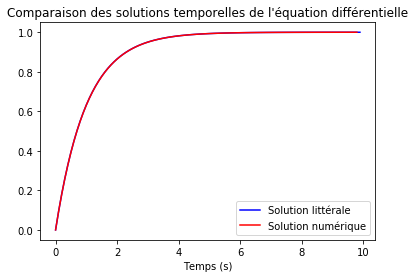

In [14]:
plt.plot(t_lit, x_lit, 'b', label="Solution littérale")
plt.plot(t_num, x_num, 'r', label="Solution numérique")
plt.legend()
plt.xlabel('Temps (s)')
plt.title("Comparaison des solutions temporelles de l'équation différentielle")
plt.show()

On remarque que la solution numérique est beaucoup plus proche de la solution littérale que sur le schéma d'ordre 1, pour le même pas de temps.

### Convergence du schéma

Pour illustrer la convergence (d'ordre 2 pour ce schéma de Heun), on vérifie que $\: \exists c_v \: / \: \forall dt, \: \underset{i\leqslant n}{\max}{|{x_{lit}[t_i]-x_{num}[t_i]}|} \leqslant c_vdt² \:$ pour différents pas de temps.

In [15]:
DT = np.linspace(0.0001,7,100)
maxs = max_erreur(DT, solver_heun)

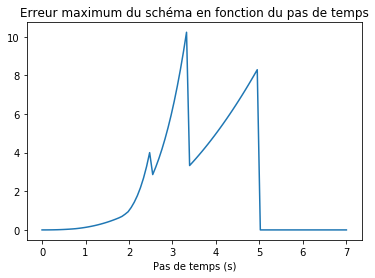

In [16]:
plt.plot(DT, maxs)
plt.xlabel('Pas de temps (s)')
plt.title("Erreur maximum du schéma en fonction du pas de temps")
plt.show()

La seule chose qui semble changer par rapport au schéma d'Euler est la pente de la courbe lorsqu'on s'approche de 0, qui semble pouvoir être majorée par une fonction quadratique. Avec y = dt² : 

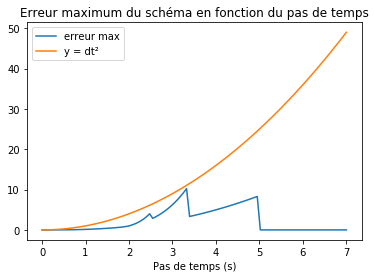

In [17]:
plt.plot(DT, maxs, label = "erreur max")
plt.plot(DT, DT**2, label = "y = dt²")
plt.legend()
plt.xlabel('Pas de temps (s)')
plt.title("Erreur maximum du schéma en fonction du pas de temps")
plt.show()

Regardons plus précisément la majoration proche de 0.

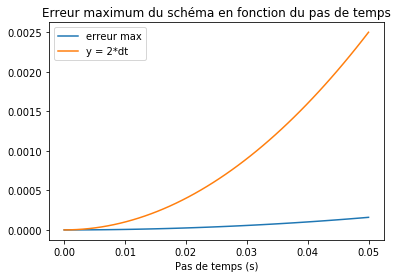

In [18]:
DT2 = np.linspace(0.00001, 0.05, 50)
plt.plot(DT2, max_erreur(DT2, solver_heun), label = "erreur max")
plt.plot(DT2, DT2**2, label = "y = 2*dt")
plt.legend()
plt.xlabel('Pas de temps (s)')
plt.title("Erreur maximum du schéma en fonction du pas de temps")
plt.show()

La majoration semble toujours valable dans ce voisinage de 0.

# Adaptation du pas de temps

## Recherche du pas de temps variable

On sait que f est $C^1$, on peut alors en déduire que $\overset{.}{x}=f(t,x)$ est de classe $C^1$ et donc $x$ est de classe $C^2$.

On sait que $e^{j+1}=x(t_{j+1}) - x^{j+1}$ avec $x(t_{j+1})$ qui est la solution au problème de Cauchy $\overset{.}{x}=f(t,x)$ avec $x_j = x(t_j)$

On peut alors appliquer le développement de Taylor à l'ordre 2 sur $x(t_{j+1})$, ce qui donne : $$x(t_{j+1}) = x(t_j)+\Delta t \dot{x}(t_j)+\Delta t^2\frac{\ddot{x}(t_j)}{2}+O(\Delta t^3)$$ ON peut alors retrouver : $$ x(t_{j+1})=x^j+\Delta tf(t_j,x^j)+\frac{\Delta t^2}{2}\frac{df}{dt}(t_j,x^j)+O(\Delta t^3) = x^j+\Delta tf(t_j,x^j)+\frac{\Delta t^2}{2}(\frac{\partial f}{\partial t}(t_j,x^j) + d(x \mapsto f(t,x)).f(t_j,x^j))+O(\Delta t^3)$$ On se sert du fait que $x^{j+1} = x^j+\Delta t_jf(t_j,x^j)$ et on obtient alors : $$e^{j+1}=\frac{\Delta t^2}{2}(\frac{df}{dt}(t_j,x^j)+ d(x \mapsto f(t,x)).f(t_j,x^j))) + O(\Delta t^3)$$

Ensuite, on retrouve cette expression en effectuant un développement limité de $f(t_{j+1},x^{j+1}) = f((t_j,x^j) + h)$ où $ h = (\Delta t_j,\Delta t_j f(t_j,x^j))$ :
$$f(t_{j+1},x^{j+1}) = f(t_j,x^j) + df(t_j,x^j).h + o(h)$$

Avec $df(t_j,x^j).h = \frac{df}{dt}(t_j,x^j)+ d(x \mapsto f(t,x)).f(t_j,x^j))$ 
Et $o(h) = o(\Delta t_j (1,f(t_j,x^j))) = O(\Delta t_j^2)$

En regroupant avec l'expression précédente, on a : $$e^{j+1}=\frac{\Delta t_j}{2}(f(t_{j+1},x^{j+1})-f(t_j,x^j)) + O(\Delta t_j^3)$$

Et donc $$ ||e^{j+1}|| = \Delta t_j  \frac{\big|\big|f(t_{j+1},x^{j+1}) - f(t_j,x^j)\big|\big|}{2} + O(\Delta t_j^3) \ $$

## Utilisation du solveur à pas variable

In [19]:

def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:   # On fait tourner le solveur tant qu'on est l'intervalle de temps donné
        while ti < dtmax: 
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x) # On applique ici le schéma d'Euler
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2) 
            dt = 0.9 * dt * sqrt(ratio_abs_error) # On prend un pas de temps légèrement inférieur à t_new, marge de sécurité
            if dt < dtmin:  # On sort de la boucle si le pas de temps est trop faible
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x) # Application du schéma d'Euler
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

### Fonctionnement du solveur

Le solveur fonctionne  de la manière suivante : On enregistre dans une liste les valeurs de x avec un intervalle de temps dtmax. Mais le solveur calcule les valeurs de x dans l'intervalle $[i*dt_{max};(i+1)*dt_{max}]$ avec le pas de temps variable pour minimiser l'erreur sur x. Ainsi le solveur permet de minimiser l'erreur mais ne nécessite pas une mémoire importante car les valeurs de la solution sont enregistrées à intervalle régulier. On évite ainsi une saturation de la mémoire quand le pas de temps est très faible et le nombre de points très important car dans tout les cas on enregistrera la valeur à l'instant i*dtmax.

### Illustration du fonctionnement et Comparaison avec le pas fixe

#### Illustration du fonctionnement

On reprend l'équation utilisée dans la méthode au pas fixe et on compare cette fois-ci la solution analytique avec la solution numérique avec pas variable.

In [ ]:
tnum,xnum

Pour le pas fixe, on prendra $dt = \frac{dt_{max}}{10}$ qui est le pas de temps initial dans la méthode à pas variable et on comparera l'erreur avec la solution analytique dans les 2 cas.